In [1]:
import torch

In [13]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3])
torch_matrix = torch.tensor([[1, 2, 1, 1],[2, 34, 2, 0], [1, 1, 1, 5]])
torch_tensor_3d = torch.tensor([[[1, 2, 3], [2, 3, 4]],[[4, 5, 6], [3, 3, 3]], [[1, 2, 1], [1, 2, 2]]])

In [14]:
torch_tensor_3d

tensor([[[1, 2, 3],
         [2, 3, 4]],

        [[4, 5, 6],
         [3, 3, 3]],

        [[1, 2, 1],
         [1, 2, 2]]])

In [15]:
torch_tensor_3d.shape

torch.Size([3, 2, 3])

In [16]:
torch_matrix

tensor([[ 1,  2,  1,  1],
        [ 2, 34,  2,  0],
        [ 1,  1,  1,  5]])

In [19]:
torch_matrix.transpose(0, 1)

tensor([[ 1,  2,  1],
        [ 2, 34,  1],
        [ 1,  2,  1],
        [ 1,  0,  5]])

In [20]:
torch_matrix.transpose(1, 0)

tensor([[ 1,  2,  1],
        [ 2, 34,  1],
        [ 1,  2,  1],
        [ 1,  0,  5]])

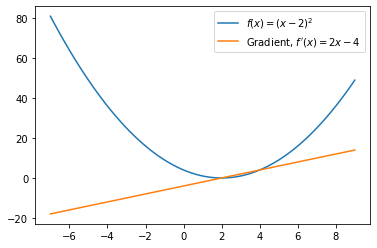

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return torch.pow((x - 2), 2)

def fP(x):
    return 2*x - 4

x_axis_vals = np.linspace(-7, 9, 100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

_ = sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="$f(x) = (x - 2)^2$")
_ = sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="Gradient, $f'(x) = 2x - 4$")
plt.show()

In [24]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [25]:
value = f(x)  # f(-3.5)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [26]:
# calculate the gradient
value.backward()
print(x.grad)

tensor([-11.])


In [28]:
f(torch.tensor(-11.))

tensor(169.)

In [29]:
# finding the value that minimize the function
x_cur = x.clone()
x_prev = x_cur*100

# threshold
epsilon = 1e-5

# learning rate
eta = 0.1

while torch.linalg.norm(x_cur - x_prev) > epsilon:
    x_prev = x_cur.clone()

    value = f(x)
    value.backward()
    x.data -= eta * x.grad

    x.grad.zero_()

    x_cur = x.data

In [30]:
x_cur

tensor([2.0000])

In [32]:
import torch.nn as nn

# using parameters, optimizers and epochs

# param
x_param = nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

# optimizer
optimizer = torch.optim.SGD([x_param], lr=eta)

# run
epochs = 60
for epoch in range(epochs):
    optimizer.zero_grad()
    loss_incurred = f(x_param)
    loss_incurred.backward()
    optimizer.step()

print(x_param.data)


tensor([2.0000])


In [71]:
# creating a personalized Dataset class
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape)

(70000, 784)


784 because we have images that are 28 x 28 pixels.

In [72]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        inputs = torch.tensor(self.X[index, :], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]

dataset = SimpleDataset(X, y)

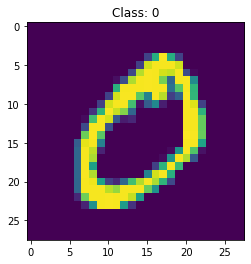

In [85]:
example, label = dataset[1]

plt.imshow(example.reshape((28, 28)))
plt.title(f"Class: {label.item()}")
plt.show()

In [86]:
# train and test splits
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

train_dataset, test_size = torch.utils.data.random_split(dataset, (train_size, test_size))


In [88]:
len(train_dataset)

56000

In [89]:
len(test_size)

14000

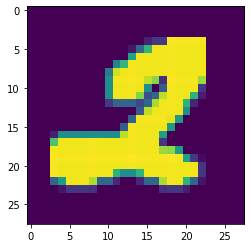

In [92]:
image, label = train_dataset[0]

plt.imshow(image.reshape((28, 28)))
plt.show()